# Task 2: Support Vector Machine (SVM) for Classification

## Library

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score
from mlxtend.plotting import plot_decision_regions

## Load Data

In [3]:
# Load Data
data_dir = "data"
iris_train_path = os.path.join(data_dir, "iris_train.csv")
iris_test_path = os.path.join(data_dir, "iris_test.csv")

train_data = pd.read_csv(iris_train_path)
test_data = pd.read_csv(iris_test_path)

In [4]:
print("Training Data Shape:", train_data.shape)

Training Data Shape: (120, 5)


In [5]:
print("Testing Data Shape:", test_data.shape)

Testing Data Shape: (30, 5)


In [6]:
print("Training Data Preview:")
display(train_data.head())

Training Data Preview:


,sepal_length,sepal_width,petal_length,petal_width,species
0,-1.506521,1.263460,-1.568735,-1.312977,setosa
1,-0.173674,3.114684,-1.284407,-1.050031,setosa
2,1.038005,0.106445,0.364699,0.264699,versicolor
3,-1.264185,0.800654,-1.227541,-1.312977,setosa
4,-1.748856,0.337848,-1.398138,-1.312977,setosa


In [7]:
print("Testing Data Preview:")
display(test_data.head())

Testing Data Preview:


,sepal_length,sepal_width,petal_length,petal_width,species
0,0.310998,-0.587764,0.535296,0.001753,versicolor
1,-0.173674,1.726266,-1.170675,-1.181504,setosa
2,2.249683,-1.050569,1.786341,1.447956,virginica
3,0.189830,-0.356361,0.421564,0.396172,versicolor
4,1.159173,-0.587764,0.592162,0.264699,versicolor


## Encode Target Label

In [8]:
# Encode Target Label
le = LabelEncoder()
train_data['species'] = le.fit_transform(train_data['species'])
test_data['species'] = le.transform(test_data['species'])

## Binary Classification (Setosa vs Versicolor)

In [9]:
print("===== BINARY CLASSIFICATION (Setosa vs Versicolor) =====")
binary_train = train_data[train_data['species'].isin([0, 1])]
binary_test = test_data[test_data['species'].isin([0, 1])]

===== BINARY CLASSIFICATION (Setosa vs Versicolor) =====


### Define Features and Target

In [10]:
# Define Features and Target
X_train_bin = binary_train.drop(columns=['species'])
y_train_bin = binary_train['species']
X_test_bin = binary_test.drop(columns=['species'])
y_test_bin = binary_test['species']

### Standardize Data

In [11]:
# Standardize Data
scaler = StandardScaler()
X_train_bin = scaler.fit_transform(X_train_bin)
X_test_bin = scaler.transform(X_test_bin)

### Train SVM Models

In [12]:
# Train SVM Models
svm_linear_bin = SVC(kernel='linear', probability=True)
svm_rbf_bin = SVC(kernel='rbf', probability=True)

svm_linear_bin.fit(X_train_bin, y_train_bin)
svm_rbf_bin.fit(X_train_bin, y_train_bin)

SVC(probability=True)

### Predictions

In [13]:
# Predictions
y_pred_linear_bin = svm_linear_bin.predict(X_test_bin)
y_pred_rbf_bin = svm_rbf_bin.predict(X_test_bin)

### Evaluation

In [14]:
# Evaluation
print("🔹 Linear Kernel Performance (Binary):")
print(classification_report(y_test_bin, y_pred_linear_bin, target_names=['Setosa', 'Versicolor']))
print("Accuracy:", accuracy_score(y_test_bin, y_pred_linear_bin))
print("Precision:", precision_score(y_test_bin, y_pred_linear_bin))
print("Recall:", recall_score(y_test_bin, y_pred_linear_bin))
print("AUC:", roc_auc_score(y_test_bin, svm_linear_bin.predict_proba(X_test_bin)[:, 1]))

print("\n🔹 RBF Kernel Performance (Binary):")
print(classification_report(y_test_bin, y_pred_rbf_bin, target_names=['Setosa', 'Versicolor']))
print("Accuracy:", accuracy_score(y_test_bin, y_pred_rbf_bin))
print("Precision:", precision_score(y_test_bin, y_pred_rbf_bin))
print("Recall:", recall_score(y_test_bin, y_pred_rbf_bin))
print("AUC:", roc_auc_score(y_test_bin, svm_rbf_bin.predict_proba(X_test_bin)[:, 1]))

🔹 Linear Kernel Performance (Binary):
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
AUC: 1.0

🔹 RBF Kernel Performance (Binary):
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
AUC: 1.0


## Multiclass Classification

### Define Features and Target

In [15]:
# Define Features and Target
print("===== MULTICLASS CLASSIFICATION =====")
X_train = train_data.drop(columns=['species'])
y_train = train_data['species']
X_test = test_data.drop(columns=['species'])
y_test = test_data['species']

===== MULTICLASS CLASSIFICATION =====


### Standardize Data

In [ ]:
# Standardize Data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Train SVM Models

In [17]:
# Train SVM Models
svm_linear = SVC(kernel='linear', probability=True)
svm_rbf = SVC(kernel='rbf', probability=True)

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

SVC(probability=True)

### Predictions

In [18]:
# Predictions
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

### Evaluation

In [19]:
# Evaluation
print("🔹 Linear Kernel Performance:")
print(classification_report(y_test, y_pred_linear, target_names=le.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("AUC:", roc_auc_score(y_test, svm_linear.predict_proba(X_test), multi_class='ovr'))

print("\n🔹 RBF Kernel Performance:")
print(classification_report(y_test, y_pred_rbf, target_names=le.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("AUC:", roc_auc_score(y_test, svm_rbf.predict_proba(X_test), multi_class='ovr'))

🔹 Linear Kernel Performance:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667
AUC: 1.0

🔹 RBF Kernel Performance:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0
AUC: 1.0


## Confusion Matrix Visualization

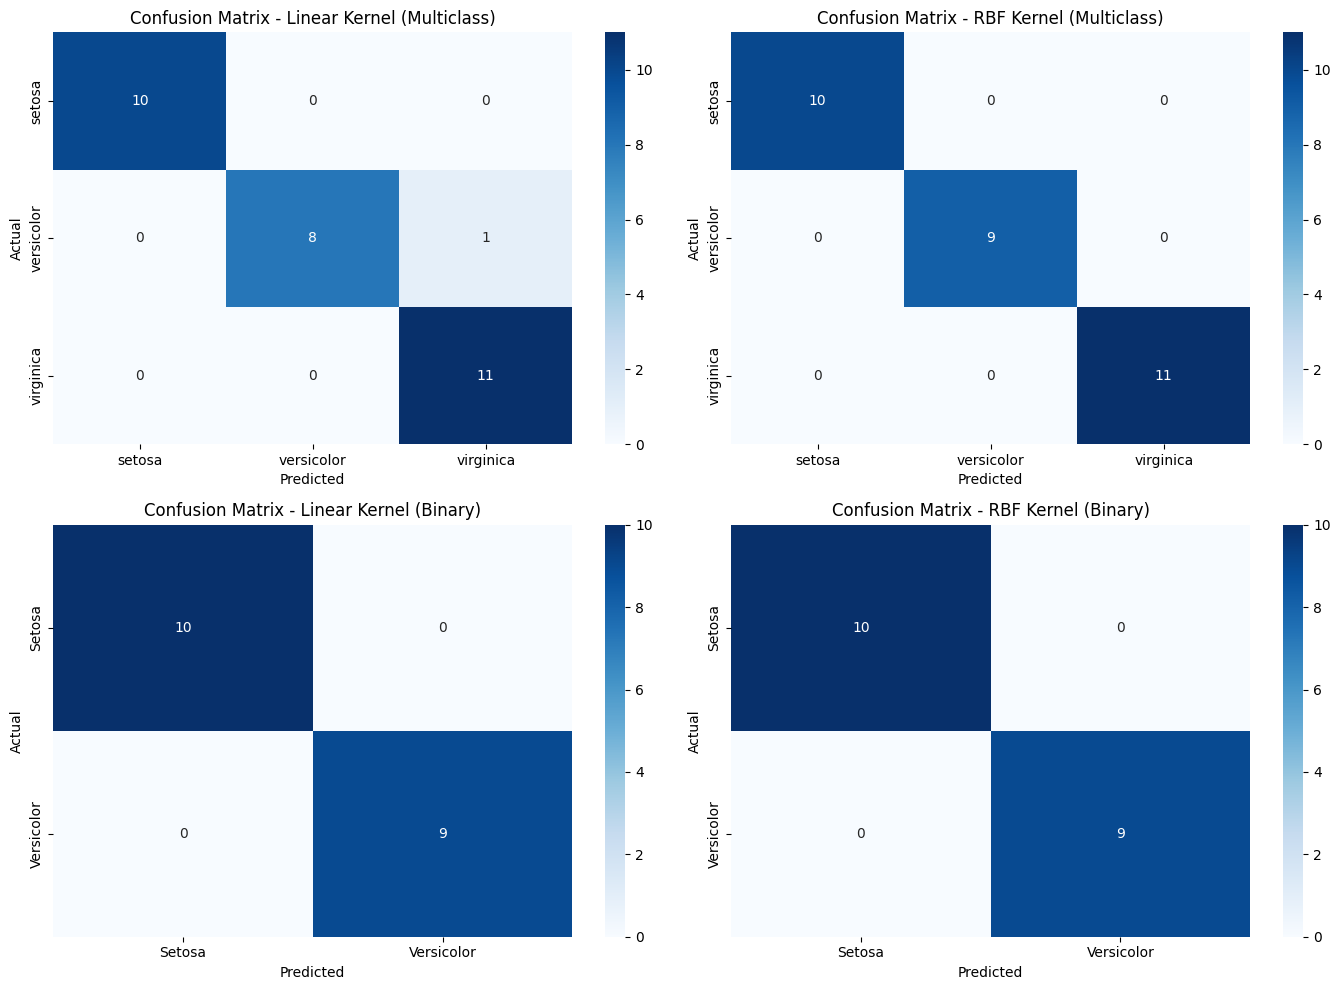

In [20]:
# Confusion Matrix Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for ax, model, title in zip(axes[0], [svm_linear, svm_rbf], ["Linear Kernel (Multiclass)", "RBF Kernel (Multiclass)"]):
    cm = confusion_matrix(y_test, model.predict(X_test))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_, ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(f"Confusion Matrix - {title}")

for ax, model, title in zip(axes[1], [svm_linear_bin, svm_rbf_bin], ["Linear Kernel (Binary)", "RBF Kernel (Binary)"]):
    cm = confusion_matrix(y_test_bin, model.predict(X_test_bin))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor'], yticklabels=['Setosa', 'Versicolor'], ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(f"Confusion Matrix - {title}")

plt.tight_layout()
plt.show()

## Visualize Decision Boundary (Only for 2 features to be plot-able)

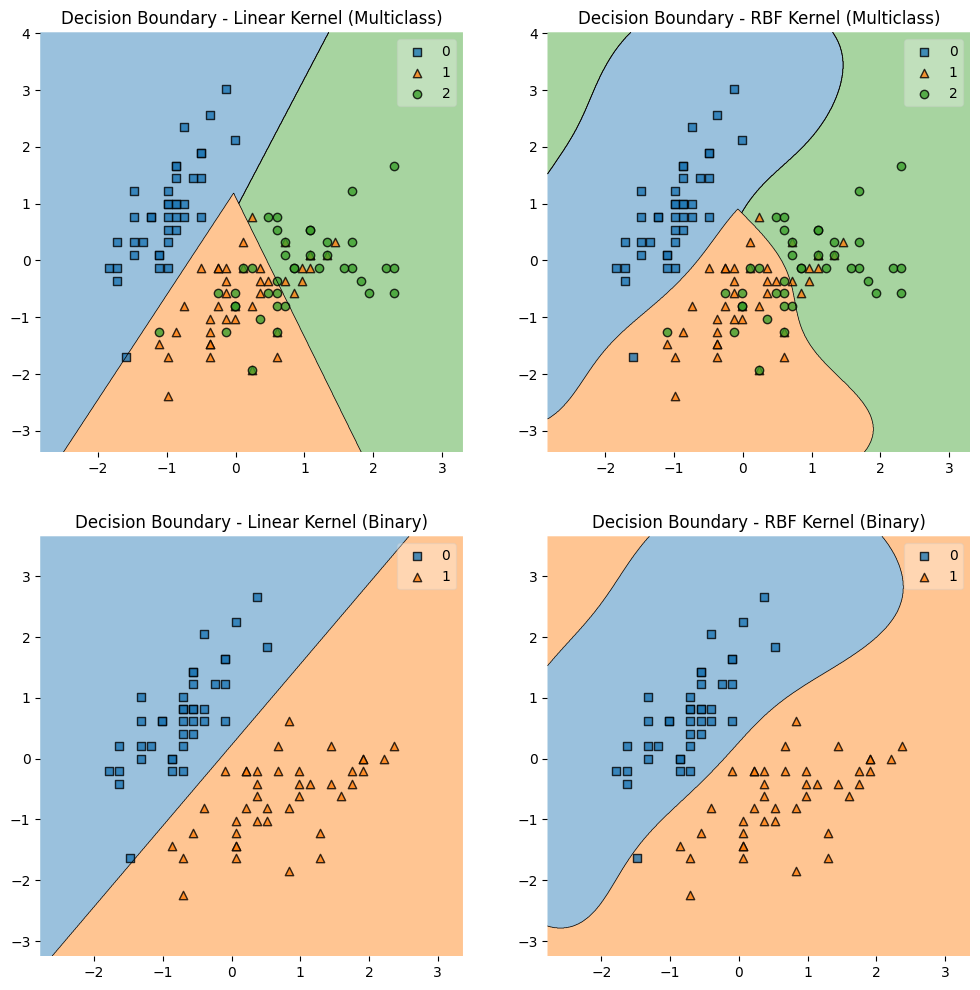

In [21]:
if X_train.shape[1] > 2:
    X_train_2d = X_train[:, :2]
    X_test_2d = X_test[:, :2]
    X_train_bin_2d = X_train_bin[:, :2]
    X_test_bin_2d = X_test_bin[:, :2]
    
    svm_linear_2d = SVC(kernel='linear')
    svm_rbf_2d = SVC(kernel='rbf')
    svm_linear_bin_2d = SVC(kernel='linear')
    svm_rbf_bin_2d = SVC(kernel='rbf')
    
    svm_linear_2d.fit(X_train_2d, y_train)
    svm_rbf_2d.fit(X_train_2d, y_train)
    svm_linear_bin_2d.fit(X_train_bin_2d, y_train_bin)
    svm_rbf_bin_2d.fit(X_train_bin_2d, y_train_bin)
    
    plt.figure(figsize=(12, 12))
    
    plt.subplot(2, 2, 1)
    plot_decision_regions(X_train_2d, y_train.to_numpy(), clf=svm_linear_2d)
    plt.title("Decision Boundary - Linear Kernel (Multiclass)")
    
    plt.subplot(2, 2, 2)
    plot_decision_regions(X_train_2d, y_train.to_numpy(), clf=svm_rbf_2d)
    plt.title("Decision Boundary - RBF Kernel (Multiclass)")
    
    plt.subplot(2, 2, 3)
    plot_decision_regions(X_train_bin_2d, y_train_bin.to_numpy(), clf=svm_linear_bin_2d)
    plt.title("Decision Boundary - Linear Kernel (Binary)")
    
    plt.subplot(2, 2, 4)
    plot_decision_regions(X_train_bin_2d, y_train_bin.to_numpy(), clf=svm_rbf_bin_2d)
    plt.title("Decision Boundary - RBF Kernel (Binary)")
    
    plt.show()